In [1]:
%cd /content/drive/MyDrive/IDS-506/CKD

/content/drive/MyDrive/IDS-506/CKD


In [2]:
!ls

'Chronic Kidney Disease Dataset.xls'  'CKD 2-28.ipynb'


In [3]:
import pandas as pd
import numpy as np

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
df = pd.read_excel('Chronic Kidney Disease Dataset.xls', sheet_name='All Data')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8819 entries, 0 to 8818
Data columns (total 34 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                8819 non-null   int64  
 1   Age               8819 non-null   int64  
 2   Female            8819 non-null   int64  
 3   Racegrp           8819 non-null   object 
 4   Educ              8799 non-null   float64
 5   Unmarried         8367 non-null   float64
 6   Income            7653 non-null   float64
 7   CareSource        8819 non-null   object 
 8   Insured           8706 non-null   float64
 9   Weight            8625 non-null   float64
 10  Height            8628 non-null   float64
 11  BMI               8529 non-null   float64
 12  Obese             8529 non-null   float64
 13  Waist             8505 non-null   float64
 14  SBP               8511 non-null   float64
 15  DBP               8439 non-null   float64
 16  HDL               8802 non-null   float64


In [7]:
df

,ID,Age,Female,Racegrp,Educ,Unmarried,Income,CareSource,Insured,Weight,Height,BMI,Obese,Waist,SBP,DBP,HDL,LDL,Total Chol,Dyslipidemia,PVD,Activity,PoorVision,Smoker,Hypertension,Fam Hypertension,Diabetes,Fam Diabetes,Stroke,CVD,Fam CVD,CHF,Anemia,CKD
0,1,65,1,white,0.0,0.0,1.0,other,1.0,56.0,162.1,21.31,0.0,83.6,135.0,71.0,48.0,249.0,297.0,0,0,3.0,0.0,1,0.0,0,0.0,1,0.0,1.0,0.0,0.0,0.0,0.0
1,2,36,1,hispa,0.0,NaN,1.0,noplace,0.0,60.2,162.2,22.88,0.0,76.6,96.0,52.0,31.0,135.0,166.0,0,0,3.0,0.0,0,0.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,66,1,white,0.0,1.0,0.0,noplace,1.0,83.9,162.5,31.77,1.0,113.2,115.0,57.0,44.0,211.0,255.0,1,0,1.0,0.0,1,0.0,0,1.0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,54,1,white,1.0,0.0,0.0,DrHMO,1.0,69.4,160.5,26.94,0.0,77.9,110.0,57.0,74.0,156.0,230.0,0,0,2.0,0.0,1,0.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,63,1,black,0.0,0.0,NaN,clinic,1.0,73.1,159.2,28.84,0.0,89.3,132.0,73.0,67.0,154.0,221.0,0,0,1.0,0.0,0,1.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8814,8815,32,1,white,1.0,0.0,1.0,DrHMO,1.0,80.4,168.6,28.28,0.0,96.0,NaN,NaN,53.0,110.0,163.0,0,0,1.0,0.0,1,0.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,NaN
8815,8816,77,1,white,0.0,1.0,0.0,clinic,1.0,67.5,159.0,26.70,0.0,92.0,157.0,44.0,87.0,166.0,253.0,0,0,3.0,0.0,0,1.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,NaN
8816,8817,56,1,white,0.0,0.0,NaN,DrHMO,1.0,49.0,162.2,18.62,0.0,75.0,126.0,81.0,61.0,224.0,285.0,0,0,3.0,0.0,0,0.0,0,0.0,1,0.0,0.0,0.0,0.0,0.0,NaN
8817,8818,25,1,black,0.0,1.0,NaN,clinic,0.0,84.2,158.5,33.52,1.0,89.0,NaN,NaN,75.0,108.0,183.0,0,0,2.0,NaN,0,0.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,NaN


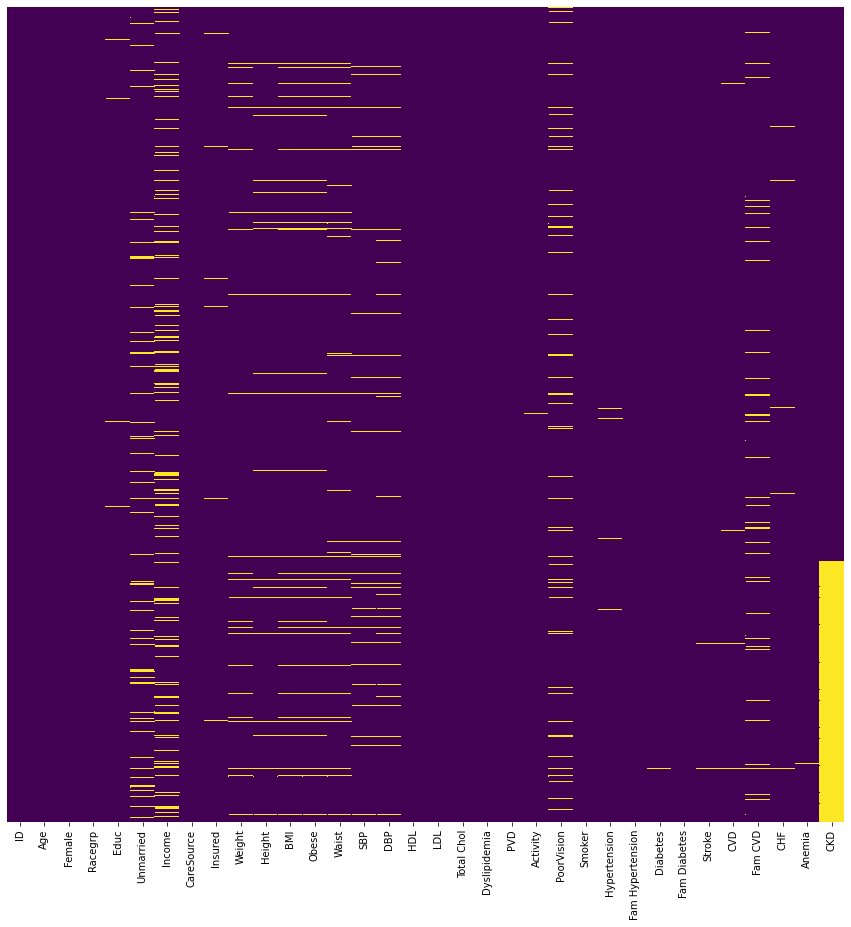

In [8]:
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis',ax=ax)

In [9]:
df.drop('ID', axis=1, inplace=True)

In [10]:
df.shape

(8819, 33)

In [11]:
df.isna().sum().sort_values(ascending = False)[df.isna().sum()>0]

CKD             2819
Income          1166
PoorVision       567
Unmarried        452
Fam CVD          419
DBP              380
Waist            314
SBP              308
BMI              290
Obese            290
Weight           194
Height           191
Insured          113
Hypertension      80
CHF               36
CVD               23
Educ              20
LDL               18
HDL               17
Total Chol        16
Stroke            11
Activity          10
Anemia             6
Diabetes           2
dtype: int64

In [12]:
df.describe()

,Age,Female,Educ,Unmarried,Income,Insured,Weight,Height,BMI,Obese,Waist,SBP,DBP,HDL,LDL,Total Chol,Dyslipidemia,PVD,Activity,PoorVision,Smoker,Hypertension,Fam Hypertension,Diabetes,Fam Diabetes,Stroke,CVD,Fam CVD,CHF,Anemia,CKD
count,8819.000000,8819.000000,8799.000000,8367.000000,7653.000000,8706.000000,8625.000000,8628.000000,8529.000000,8529.000000,8505.000000,8511.000000,8439.000000,8802.000000,8801.000000,8803.000000,8819.000000,8819.000000,8809.000000,8252.000000,8819.000000,8739.000000,8819.000000,8817.000000,8819.000000,8808.000000,8796.000000,8400.000000,8783.00000,8813.000000,6000.000000
mean,49.358204,0.527271,0.431413,0.368591,0.417222,0.804503,79.094342,167.026854,28.294348,0.315746,96.839976,125.810833,71.508947,51.828334,152.571299,204.403385,0.105454,0.039233,2.028153,0.063863,0.304116,0.401419,0.233246,0.111376,0.311713,0.031449,0.066394,0.343214,0.02892,0.020424,0.077333
std,18.828726,0.499284,0.495302,0.482452,0.493132,0.396606,19.410707,10.099770,6.186076,0.464840,15.099678,21.034786,12.663171,15.786402,42.994626,42.797748,0.307155,0.194161,0.815037,0.244524,0.460058,0.490213,0.422922,0.314615,0.463220,0.174537,0.248983,0.474811,0.16759,0.141455,0.267142
min,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,25.600000,130.400000,12.040000,0.000000,58.500000,72.000000,10.000000,8.000000,27.000000,72.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,33.000000,0.000000,0.000000,0.000000,0.000000,1.000000,65.400000,159.675000,24.080000,0.000000,86.200000,111.000000,64.000000,41.000000,123.000000,176.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,47.000000,1.000000,0.000000,0.000000,0.000000,1.000000,76.700000,166.600000,27.360000,0.000000,96.300000,122.000000,72.000000,49.000000,149.000000,201.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
75%,65.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.500000,174.200000,31.360000,1.000000,106.100000,136.000000,79.000000,60.000000,177.000000,230.000000,0.000000,0.000000,2.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000
max,85.000000,1.000000,1.000000,1.000000,1.000000,1.000000,193.300000,200.100000,66.440000,1.000000,173.400000,233.000000,132.000000,160.000000,684.000000,727.000000,1.000000,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [13]:
df['Income']=df['Income'].fillna(value=-9)

In [14]:
df['PoorVision']=df['PoorVision'].fillna(value=-9)

In [15]:
df['Unmarried']=df['Unmarried'].fillna(value=-9)

In [16]:
df['Fam CVD']=df['Fam CVD'].fillna(value=-9)

In [17]:
df['DBP']=df['DBP'].fillna(value=df['DBP'].mean())

In [18]:
df['Waist']=df['Waist'].fillna(value=df['Waist'].mean())

In [19]:
df['SBP']=df['SBP'].fillna(value=df['SBP'].mean())

In [20]:
df['Weight']=df['Weight'].fillna(value=df['Weight'].mean())

In [21]:
df['Height']=df['Height'].fillna(value=df['Height'].mean())

In [22]:
df[['Weight','Height','BMI','Obese']].iloc[77]

Weight     79.094342
Height    167.026854
BMI              NaN
Obese            NaN
Name: 77, dtype: float64

In [23]:
df['BMI'] = df['BMI'].fillna(value= ((df['Weight']/df['Height'])/df['Height'])*10000)

In [24]:
df[['Weight','Height','BMI','Obese']].iloc[77]

Weight     79.094342
Height    167.026854
BMI        28.351289
Obese            NaN
Name: 77, dtype: float64

In [25]:
df[['Weight','Height','BMI','Obese']].iloc[265]

Weight    104.800000
Height    167.026854
BMI        37.565457
Obese            NaN
Name: 265, dtype: float64

In [26]:
df.loc[(df['BMI']>30) & (df['Obese'].isnull()),'Obese']=1

In [27]:
df.loc[(df['BMI']<=30) & (df['Obese'].isnull()),'Obese']=0

In [28]:
df[['Weight','Height','BMI','Obese']].iloc[77]

Weight     79.094342
Height    167.026854
BMI        28.351289
Obese       0.000000
Name: 77, dtype: float64

In [29]:
df[['Weight','Height','BMI','Obese']].iloc[265]

Weight    104.800000
Height    167.026854
BMI        37.565457
Obese       1.000000
Name: 265, dtype: float64

In [30]:
df['Insured']=df['Insured'].fillna(value=-9)

In [31]:
df['Hypertension']=df['Hypertension'].fillna(value=-9)

In [32]:
df['CHF']=df['CHF'].fillna(value=-9)

In [33]:
df['CVD']=df['CVD'].fillna(value=-9)

In [34]:
df['Educ']=df['Educ'].fillna(value=-9)

In [35]:
df['LDL']=df['LDL'].fillna(value=df['LDL'].mean())

In [36]:
df['HDL']=df['HDL'].fillna(value=df['HDL'].mean())

In [37]:
df['Total Chol']=df['Total Chol'].fillna(value=df['Total Chol'].mean())

In [38]:
df['Stroke']=df['Stroke'].fillna(value=-9)

In [39]:
df['Activity']=df['Activity'].fillna(value=2)

In [40]:
df['Anemia']=df['Anemia'].fillna(value=-9)

In [41]:
df['Diabetes']=df['Diabetes'].fillna(value=-9)

In [42]:
df.isna().sum().sort_values(ascending = False)[df.isna().sum()>0]

CKD    2819
dtype: int64

In [43]:
df['CareSource'].value_counts()

DrHMO      5123
clinic     1873
noplace    1353
other       467
              3
Name: CareSource, dtype: int64

In [44]:
df.loc[df['CareSource']==' ','CareSource']='other'

In [45]:
df['CareSource'].value_counts()

DrHMO      5123
clinic     1873
noplace    1353
other       470
Name: CareSource, dtype: int64

In [46]:
df['Racegrp'].value_counts()

white    4340
hispa    2593
black    1606
other     280
Name: Racegrp, dtype: int64

In [47]:
df.shape

(8819, 33)

In [48]:
df.describe()

,Age,Female,Educ,Unmarried,Income,Insured,Weight,Height,BMI,Obese,Waist,SBP,DBP,HDL,LDL,Total Chol,Dyslipidemia,PVD,Activity,PoorVision,Smoker,Hypertension,Fam Hypertension,Diabetes,Fam Diabetes,Stroke,CVD,Fam CVD,CHF,Anemia,CKD
count,8819.000000,8819.000000,8819.000000,8819.000000,8819.000000,8819.000000,8819.000000,8819.000000,8819.000000,8819.000000,8819.000000,8819.000000,8819.000000,8819.000000,8819.000000,8819.000000,8819.000000,8819.000000,8819.000000,8819.000000,8819.000000,8819.000000,8819.000000,8819.000000,8819.000000,8819.000000,8819.000000,8819.000000,8819.000000,8819.000000,6000.000000
mean,49.358204,0.527271,0.410024,-0.111577,-0.827872,0.678875,79.094342,167.026854,28.283946,0.312054,96.839976,125.810833,71.508947,51.828334,152.571299,204.403385,0.105454,0.039233,2.028121,-0.518880,0.304116,0.316136,0.233246,0.109309,0.311713,0.020184,0.042749,-0.100692,-0.007937,0.014287,0.077333
std,18.828726,0.499284,0.667877,2.118785,3.222925,1.171047,19.195997,9.989789,6.149867,0.463358,14.828399,20.664163,12.387315,15.771178,42.950722,42.758902,0.307155,0.194161,0.814575,2.235804,0.460058,1.016233,0.422922,0.343198,0.463220,0.363385,0.525046,2.040989,0.599524,0.274451,0.267142
min,20.000000,0.000000,-9.000000,-9.000000,-9.000000,-9.000000,25.600000,130.400000,12.040000,0.000000,58.500000,72.000000,10.000000,8.000000,27.000000,72.000000,0.000000,0.000000,1.000000,-9.000000,0.000000,-9.000000,0.000000,-9.000000,0.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,0.000000
25%,33.000000,0.000000,0.000000,0.000000,0.000000,1.000000,65.700000,159.900000,24.120000,0.000000,86.500000,112.000000,64.500000,41.000000,123.000000,176.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,47.000000,1.000000,0.000000,0.000000,0.000000,1.000000,77.300000,166.900000,27.420000,0.000000,96.839976,123.000000,71.508947,49.000000,149.000000,201.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,65.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.200000,174.000000,31.290000,1.000000,105.600000,135.000000,79.000000,60.000000,177.000000,229.000000,0.000000,0.000000,2.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,85.000000,1.000000,1.000000,1.000000,1.000000,1.000000,193.300000,200.100000,66.440000,1.000000,173.400000,233.000000,132.000000,160.000000,684.000000,727.000000,1.000000,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Data Visualization

In [49]:
sns.set_style('whitegrid')

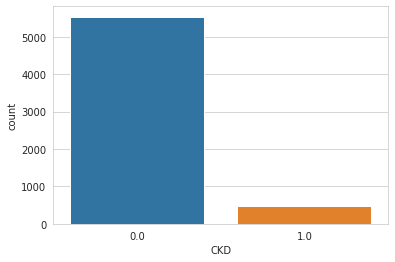

In [50]:
sns.countplot(x='CKD', data=df)

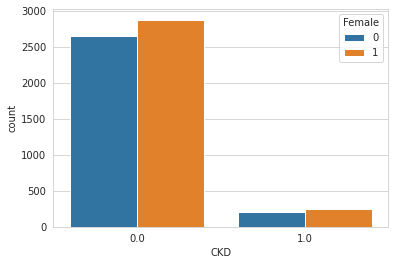

In [51]:
sns.countplot(x='CKD',hue='Female', data=df)

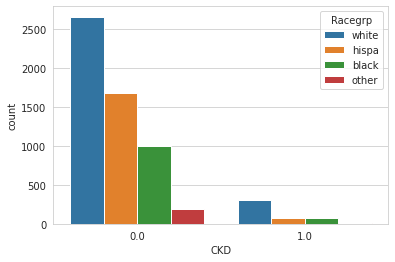

In [52]:
sns.countplot(x='CKD',hue='Racegrp', data=df)

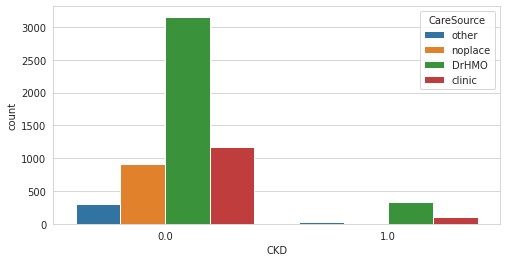

In [53]:
fig, ax = plt.subplots(figsize=(8,4))
sns.countplot(x='CKD',hue='CareSource', data=df, ax=ax)

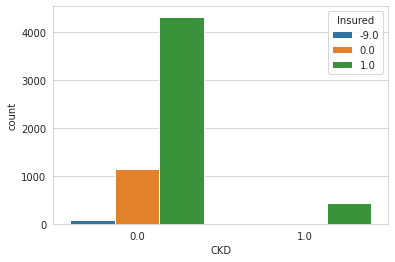

In [54]:
sns.countplot(x='CKD',hue='Insured', data=df)

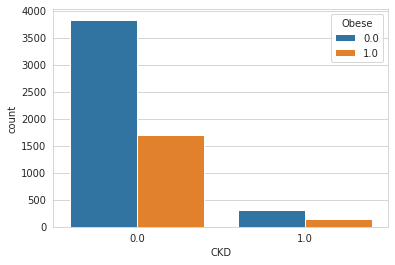

In [55]:
sns.countplot(x='CKD',hue='Obese', data=df)

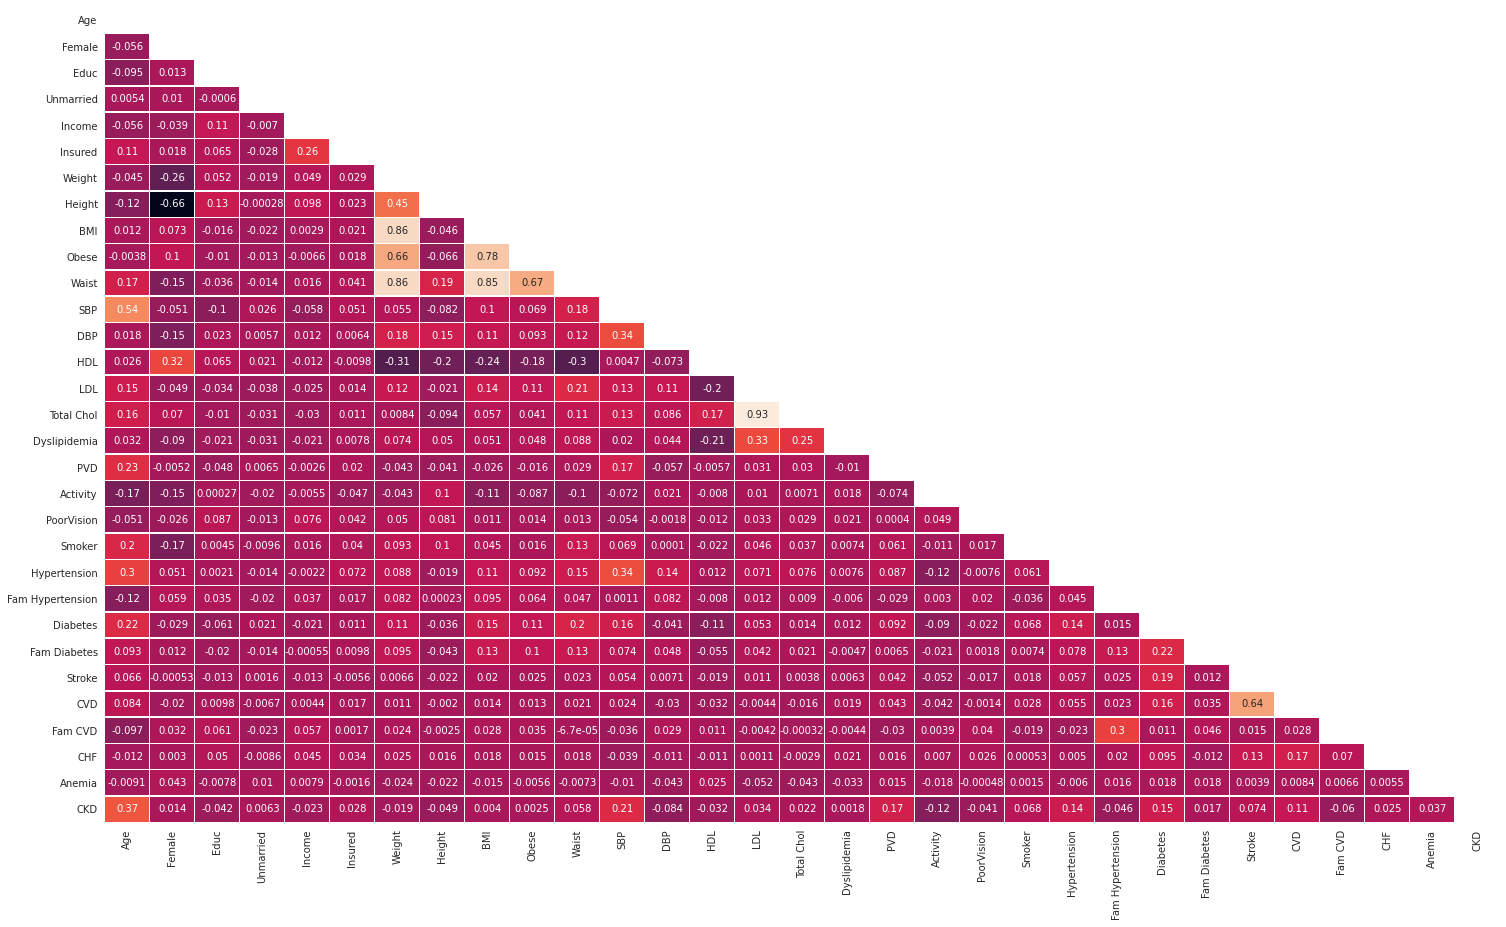

In [89]:
mask = np.zeros_like(df.corr())
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(25,15))
sns.heatmap(df.corr(),annot= True, ax=ax,mask=mask, cbar=False, linewidths=0.5)

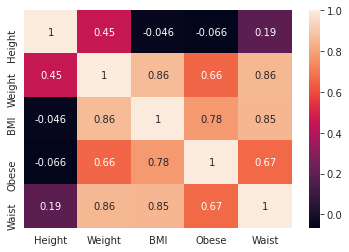

In [90]:
sns.heatmap(df[['Height','Weight','BMI','Obese','Waist']].corr(),annot= True)

In [91]:
df.shape

(8819, 33)

In [92]:
df = pd.get_dummies(df, columns=['Racegrp','CareSource','Activity'], drop_first=True)

In [217]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8819 entries, 0 to 8818
Data columns (total 39 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 8819 non-null   int64  
 1   Female              8819 non-null   int64  
 2   Educ                8819 non-null   float64
 3   Unmarried           8819 non-null   float64
 4   Income              8819 non-null   float64
 5   Insured             8819 non-null   float64
 6   Weight              8819 non-null   float64
 7   Height              8819 non-null   float64
 8   BMI                 8819 non-null   float64
 9   Obese               8819 non-null   float64
 10  Waist               8819 non-null   float64
 11  SBP                 8819 non-null   float64
 12  DBP                 8819 non-null   float64
 13  HDL                 8819 non-null   float64
 14  LDL                 8819 non-null   float64
 15  Total Chol          8819 non-null   float64
 16  Dyslip

In [94]:
df.head(2)

,Age,Female,Educ,Unmarried,Income,Insured,Weight,Height,BMI,Obese,Waist,SBP,DBP,HDL,LDL,Total Chol,Dyslipidemia,PVD,PoorVision,Smoker,Hypertension,Fam Hypertension,Diabetes,Fam Diabetes,Stroke,CVD,Fam CVD,CHF,Anemia,CKD,Racegrp_hispa,Racegrp_other,Racegrp_white,CareSource_clinic,CareSource_noplace,CareSource_other,Activity_2.0,Activity_3.0,Activity_4.0
0,65,1,0.0,0.0,1.0,1.0,56.0,162.1,21.31,0.0,83.6,135.0,71.0,48.0,249.0,297.0,0,0,0.0,1,0.0,0,0.0,1,0.0,1.0,0.0,0.0,0.0,0.0,0,0,1,0,0,1,0,1,0
1,36,1,0.0,-9.0,1.0,0.0,60.2,162.2,22.88,0.0,76.6,96.0,52.0,31.0,135.0,166.0,0,0,0.0,0,0.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,1,0,0,1,0


In [95]:
df['CKD'][1:6000].isna().sum()

0

In [96]:
df['CKD'][6000:].isna().sum()

2819

In [97]:
df1 = df[0:6000]

In [98]:
df1.shape

(6000, 39)

In [162]:
df2 = df[6000:]

In [100]:
df2.shape

(2819, 39)

In [138]:
X=df1.drop('CKD', axis=1)
y=df1['CKD']

In [102]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [139]:
vif_data = pd.DataFrame() 
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) 
                          for i in range(len(X.columns))] 
  
print(vif_data)

               feature           VIF
0                  Age     16.636866
1               Female      4.604559
2                 Educ      1.534949
3            Unmarried      1.012617
4               Income      1.192349
5              Insured      1.483041
6               Weight    216.770501
7               Height    168.929992
8                  BMI    259.131874
9                Obese      3.712089
10               Waist    273.696565
11                 SBP     69.518561
12                 DBP     45.980885
13                 HDL   6591.626691
14                 LDL  55919.316002
15          Total Chol  97143.004416
16        Dyslipidemia      1.304864
17                 PVD      1.124297
18          PoorVision      1.091117
19              Smoker      1.586929
20        Hypertension      1.349732
21    Fam Hypertension      1.500456
22            Diabetes      1.346642
23        Fam Diabetes      1.605395
24              Stroke      1.582640
25                 CVD      1.577878
2

In [140]:
X.drop(['HDL','Total Chol'], axis=1, inplace=True)

In [141]:
vif_data = pd.DataFrame() 
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) 
                          for i in range(len(X.columns))] 
  
print(vif_data)

               feature         VIF
0                  Age   16.531583
1               Female    4.279646
2                 Educ    1.530930
3            Unmarried    1.009869
4               Income    1.192188
5              Insured    1.481195
6               Weight  211.995136
7               Height  143.930668
8                  BMI  257.331906
9                Obese    3.711456
10               Waist  273.099920
11                 SBP   69.349577
12                 DBP   45.938285
13                 LDL   17.078963
14        Dyslipidemia    1.275170
15                 PVD    1.118928
16          PoorVision    1.091104
17              Smoker    1.580590
18        Hypertension    1.349633
19    Fam Hypertension    1.500442
20            Diabetes    1.339138
21        Fam Diabetes    1.604935
22              Stroke    1.581681
23                 CVD    1.577314
24             Fam CVD    1.117666
25                 CHF    1.046601
26              Anemia    1.013779
27       Racegrp_his

In [142]:
X.drop(['Weight','Height','Waist'], axis=1, inplace=True)

In [143]:
vif_data = pd.DataFrame() 
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) 
                          for i in range(len(X.columns))] 
  
print(vif_data)

               feature        VIF
0                  Age  14.986794
1               Female   2.333772
2                 Educ   1.495464
3            Unmarried   1.009292
4               Income   1.191360
5              Insured   1.477748
6                  BMI  40.504010
7                Obese   3.030732
8                  SBP  62.196271
9                  DBP  39.233732
10                 LDL  16.243532
11        Dyslipidemia   1.273246
12                 PVD   1.116663
13          PoorVision   1.087326
14              Smoker   1.575743
15        Hypertension   1.299685
16    Fam Hypertension   1.499651
17            Diabetes   1.326926
18        Fam Diabetes   1.603792
19              Stroke   1.581198
20                 CVD   1.574309
21             Fam CVD   1.117445
22                 CHF   1.046513
23              Anemia   1.010841
24       Racegrp_hispa   2.719824
25       Racegrp_other   1.188459
26       Racegrp_white   3.945709
27   CareSource_clinic   1.405357
28  CareSource

In [144]:
X.drop(['DBP'], axis=1, inplace=True)

In [145]:
vif_data = pd.DataFrame() 
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) 
                          for i in range(len(X.columns))] 
  
print(vif_data)

               feature        VIF
0                  Age  14.558977
1               Female   2.309547
2                 Educ   1.484137
3            Unmarried   1.009234
4               Income   1.191301
5              Insured   1.477302
6                  BMI  37.172697
7                Obese   2.955191
8                  SBP  43.192858
9                  LDL  15.857548
10        Dyslipidemia   1.272952
11                 PVD   1.109643
12          PoorVision   1.087021
13              Smoker   1.575741
14        Hypertension   1.299674
15    Fam Hypertension   1.497327
16            Diabetes   1.311546
17        Fam Diabetes   1.602114
18              Stroke   1.581064
19                 CVD   1.573384
20             Fam CVD   1.117380
21                 CHF   1.045855
22              Anemia   1.010330
23       Racegrp_hispa   2.718217
24       Racegrp_other   1.184322
25       Racegrp_white   3.935036
26   CareSource_clinic   1.401443
27  CareSource_noplace   1.475216
28    CareSour

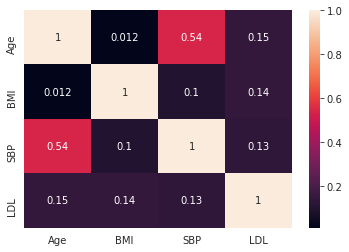

In [146]:
sns.heatmap(df[['Age','BMI','SBP','LDL']].corr(),annot= True)

In [147]:
from sklearn.model_selection import train_test_split

In [148]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [149]:
from sklearn.linear_model import LogisticRegression

In [150]:
log_model = LogisticRegression(max_iter=10000)

In [151]:
log_model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [152]:
predictions = log_model.predict(X_test)

In [153]:
from sklearn.metrics import classification_report

In [154]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

         0.0       0.92      0.99      0.95      1637
         1.0       0.44      0.10      0.16       163

    accuracy                           0.91      1800
   macro avg       0.68      0.54      0.56      1800
weighted avg       0.87      0.91      0.88      1800



In [155]:
from sklearn.metrics import confusion_matrix

In [156]:
confusion_matrix(y_test,predictions)

array([[1617,   20],
       [ 147,   16]])

In [163]:
df2

,Age,Female,Educ,Unmarried,Income,Insured,Weight,Height,BMI,Obese,Waist,SBP,DBP,HDL,LDL,Total Chol,Dyslipidemia,PVD,PoorVision,Smoker,Hypertension,Fam Hypertension,Diabetes,Fam Diabetes,Stroke,CVD,Fam CVD,CHF,Anemia,CKD,Racegrp_hispa,Racegrp_other,Racegrp_white,CareSource_clinic,CareSource_noplace,CareSource_other,Activity_2.0,Activity_3.0,Activity_4.0
6000,69,1,0.0,0.0,1.0,1.0,73.500000,157.700000,29.550000,0.0,91.000000,128.000000,73.000000,65.0,112.0,177.0,0,0,0.0,0,1.0,0,0.0,1,0.0,0.0,0.0,0.0,0.0,NaN,0,0,1,0,0,0,0,0,0
6001,40,0,0.0,1.0,0.0,0.0,68.300000,180.600000,20.940000,0.0,89.300000,131.000000,75.000000,47.0,101.0,148.0,0,0,0.0,0,0.0,1,0.0,1,0.0,0.0,1.0,0.0,0.0,NaN,0,0,1,0,0,0,0,0,1
6002,76,0,1.0,0.0,1.0,1.0,79.094342,167.026854,28.351289,0.0,96.839976,133.000000,73.000000,35.0,180.0,215.0,0,0,-9.0,1,0.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,NaN,0,0,1,0,0,0,0,0,0
6003,70,1,0.0,1.0,0.0,1.0,68.400000,154.800000,28.540000,0.0,98.300000,129.000000,76.000000,45.0,239.0,284.0,0,0,0.0,1,0.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,NaN,0,0,0,1,0,0,0,0,0
6004,24,1,0.0,0.0,0.0,1.0,65.500000,154.200000,27.550000,0.0,83.500000,107.000000,71.000000,43.0,66.0,109.0,0,0,0.0,0,0.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,NaN,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8814,32,1,1.0,0.0,1.0,1.0,80.400000,168.600000,28.280000,0.0,96.000000,125.810833,71.508947,53.0,110.0,163.0,0,0,0.0,1,0.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,NaN,0,0,1,0,0,0,0,0,0
8815,77,1,0.0,1.0,0.0,1.0,67.500000,159.000000,26.700000,0.0,92.000000,157.000000,44.000000,87.0,166.0,253.0,0,0,0.0,0,1.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,NaN,0,0,1,1,0,0,0,1,0
8816,56,1,0.0,0.0,-9.0,1.0,49.000000,162.200000,18.620000,0.0,75.000000,126.000000,81.000000,61.0,224.0,285.0,0,0,0.0,0,0.0,0,0.0,1,0.0,0.0,0.0,0.0,0.0,NaN,0,0,1,0,0,0,0,1,0
8817,25,1,0.0,1.0,-9.0,0.0,84.200000,158.500000,33.520000,1.0,89.000000,125.810833,71.508947,75.0,108.0,183.0,0,0,-9.0,0,0.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,NaN,0,0,0,1,0,0,1,0,0


In [ ]:
X_Validation = df2.drop('CKD',axis=1)

In [165]:
X_Validation.drop(['HDL','Total Chol','Weight','Height','Waist','DBP'],axis=1,inplace=True)

In [167]:
X_Validation

,Age,Female,Educ,Unmarried,Income,Insured,BMI,Obese,SBP,LDL,Dyslipidemia,PVD,PoorVision,Smoker,Hypertension,Fam Hypertension,Diabetes,Fam Diabetes,Stroke,CVD,Fam CVD,CHF,Anemia,Racegrp_hispa,Racegrp_other,Racegrp_white,CareSource_clinic,CareSource_noplace,CareSource_other,Activity_2.0,Activity_3.0,Activity_4.0
6000,69,1,0.0,0.0,1.0,1.0,29.550000,0.0,128.000000,112.0,0,0,0.0,0,1.0,0,0.0,1,0.0,0.0,0.0,0.0,0.0,0,0,1,0,0,0,0,0,0
6001,40,0,0.0,1.0,0.0,0.0,20.940000,0.0,131.000000,101.0,0,0,0.0,0,0.0,1,0.0,1,0.0,0.0,1.0,0.0,0.0,0,0,1,0,0,0,0,0,1
6002,76,0,1.0,0.0,1.0,1.0,28.351289,0.0,133.000000,180.0,0,0,-9.0,1,0.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0,1,0,0,0,0,0,0
6003,70,1,0.0,1.0,0.0,1.0,28.540000,0.0,129.000000,239.0,0,0,0.0,1,0.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0,0,1,0,0,0,0,0
6004,24,1,0.0,0.0,0.0,1.0,27.550000,0.0,107.000000,66.0,0,0,0.0,0,0.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8814,32,1,1.0,0.0,1.0,1.0,28.280000,0.0,125.810833,110.0,0,0,0.0,1,0.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0,1,0,0,0,0,0,0
8815,77,1,0.0,1.0,0.0,1.0,26.700000,0.0,157.000000,166.0,0,0,0.0,0,1.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0,1,1,0,0,0,1,0
8816,56,1,0.0,0.0,-9.0,1.0,18.620000,0.0,126.000000,224.0,0,0,0.0,0,0.0,0,0.0,1,0.0,0.0,0.0,0.0,0.0,0,0,1,0,0,0,0,1,0
8817,25,1,0.0,1.0,-9.0,0.0,33.520000,1.0,125.810833,108.0,0,0,-9.0,0,0.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0,0,1,0,0,1,0,0


In [184]:
y_Validation = log_model.predict(X_Validation)

In [185]:
y_Validation

array([0., 0., 0., ..., 0., 0., 0.])

In [188]:
y_Validation = pd.DataFrame(y_Validation)

In [189]:
y_Validation

,0
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
2814,0.0
2815,0.0
2816,0.0
2817,0.0


In [190]:
y_Validation.value_counts()

0.0    2754
1.0      65
dtype: int64

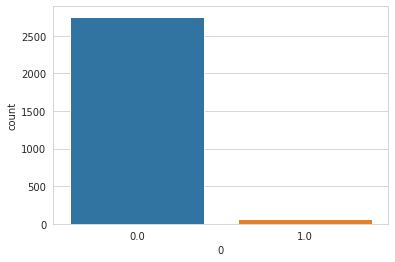

In [191]:
sns.countplot(x=0,data=y_Validation)

In [196]:
coefficients = log_model.coef_.reshape(32,1)

In [197]:
cdf = pd.DataFrame(coefficients,X_train.columns, columns=['Coeffecients'])

In [205]:
cdf[cdf['Coeffecients']>0.3]

,Coeffecients
PVD,0.610547
Hypertension,0.767999
Diabetes,0.688485
CVD,0.662469
Anemia,1.369124
Racegrp_white,0.372378


In [211]:
cdf['Coeffecients'].sort_values(ascending=False)

Anemia                1.369124
Hypertension          0.767999
Diabetes              0.688485
CVD                   0.662469
PVD                   0.610547
Racegrp_white         0.372378
CareSource_other      0.204611
Female                0.107568
CHF                   0.099048
Age                   0.078063
Educ                  0.046570
CareSource_noplace    0.042421
Unmarried             0.028490
CareSource_clinic     0.025288
BMI                   0.008609
LDL                   0.003612
Fam Diabetes         -0.000149
SBP                  -0.001638
Income               -0.003505
Fam CVD              -0.018182
Smoker               -0.018712
PoorVision           -0.021428
Stroke               -0.050572
Fam Hypertension     -0.058836
Obese                -0.068124
Dyslipidemia         -0.095294
Insured              -0.112460
Activity_2.0         -0.263162
Activity_4.0         -0.304930
Activity_3.0         -0.460409
Racegrp_other        -0.506941
Racegrp_hispa        -0.664308
Name: Co

In [219]:
model_odds = pd.DataFrame(np.exp(log_model.params), columns= ['OR'])
model_odds

AttributeError: ignored

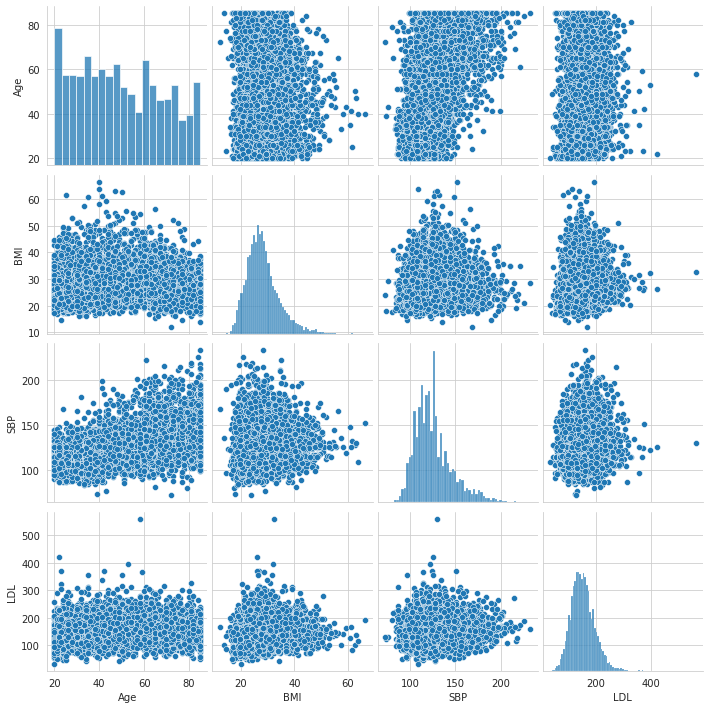

In [216]:
df_p1 = df1[['Age','BMI','SBP','LDL']]
sns.pairplot(df_p1)

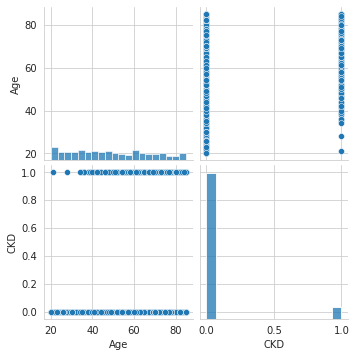

In [218]:
df_p1 = df1[['Age','CKD']]
sns.pairplot(df_p1)